In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [34]:
data = pd.read_csv('datasets/student_scores.csv')
data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


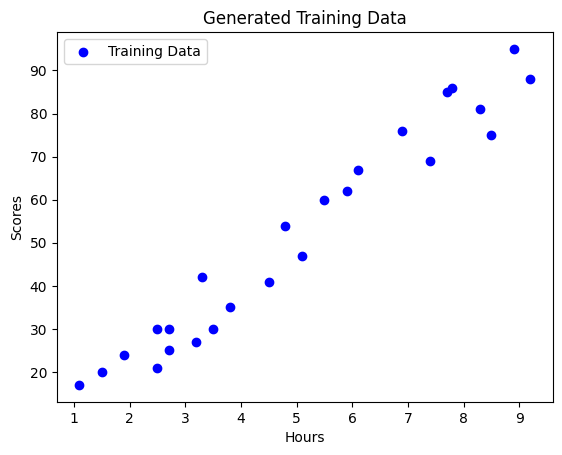

In [35]:
plt.scatter(data['Hours'].values, data['Scores'].values, color='blue', label='Training Data')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Generated Training Data")
plt.legend()
plt.show()

In [36]:
feature = data[['Hours']].values  # Feature (Study Hours)
target = data[['Scores']].values  # Target (Exam Scores)
print(feature)
print('*****************************')
print(feature)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
*****************************
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [37]:
feature_mean = np.mean(feature)
feature_std = np.std(feature) 
feature_norm = (feature - feature_mean ) / feature_std
print(feature_norm.shape)

(25, 1)


In [38]:
# add intercept column to theata matrix 

final_feature = np.c_[np.ones((feature_norm.shape[0] , 1)) , feature_norm]
final_feature

array([[ 1.        , -1.01532822],
       [ 1.        ,  0.03556882],
       [ 1.        , -0.7323944 ],
       [ 1.        ,  1.40981881],
       [ 1.        , -0.61113705],
       [ 1.        , -1.4195194 ],
       [ 1.        ,  1.69275263],
       [ 1.        ,  0.19724529],
       [ 1.        ,  1.32898057],
       [ 1.        , -0.93448999],
       [ 1.        ,  1.08646587],
       [ 1.        ,  0.35892176],
       [ 1.        , -0.20694588],
       [ 1.        , -0.69197529],
       [ 1.        , -1.58119586],
       [ 1.        ,  1.57149528],
       [ 1.        , -1.01532822],
       [ 1.        , -1.25784293],
       [ 1.        ,  0.43975999],
       [ 1.        ,  0.96520852],
       [ 1.        , -0.93448999],
       [ 1.        , -0.08568853],
       [ 1.        , -0.4898797 ],
       [ 1.        ,  0.76311293],
       [ 1.        ,  1.12688499]])

In [39]:
#dfine  the Cost Function (Mean Squared Error)
def compute_cost(feature, target, theta):
    m = len(target)  # Number of training examples
    predictions = feature.dot(theta)  # h_theta(x) = theta_0 + theta_1 * x
    cost = (1 / (2 * m)) * np.sum((predictions - target) ** 2)
    return cost



In [40]:
# Gradient Descent Algorithm

def gradient_desent (feature , traget , theta , alpha,  iteration) : 
    m = len(target)
    cost_history = []

    for i in range(iteration):
        predictions = feature.dot(theta)
        
        errors = predictions - traget

        theta -= 1/m * alpha * feature.T.dot(errors)

        cost_history.append(compute_cost(feature , traget , theta))
    return theta , cost_history    



In [41]:
# Initialize parameters
theta_initial = np.random.randn(2, 1)
alpha = 0.1  # Learning rate
iterations = 1000


In [42]:
theta_optimal, cost_history = gradient_desent(final_feature , target , theta_initial , alpha , iterations) 

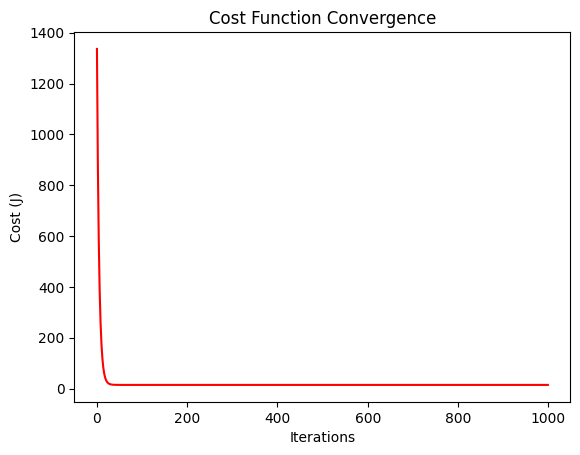

In [48]:
# Plot Cost Function Convergence
plt.plot(range(iterations), cost_history, color='red')
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Cost Function Convergence")
plt.show()

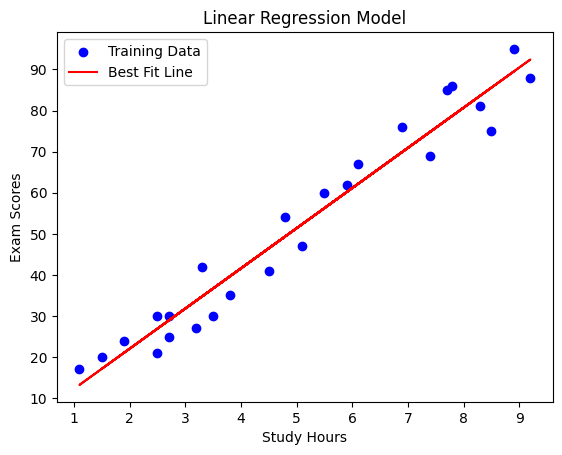

In [47]:
# Plot Best-Fit Line
feature_orig = feature_norm * feature_std + feature_mean  # Reverse normalization
plt.scatter(feature_orig, target, color='blue', label="Training Data")
plt.plot(feature_orig, final_feature.dot(theta_optimal), color='red', label="Best Fit Line")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.title("Linear Regression Model")
plt.legend()
plt.show()

In [49]:
print("Optimal Theta (Parameters):", theta_optimal)

Optimal Theta (Parameters): [[51.48      ]
 [24.18608835]]


In [50]:
theta_optimal.shape

(2, 1)